## Micro-theory

- OHLCV: Open, High, Low, Close, Volume. Use adjusted prices to include splits/dividends for total-return realism

- Percent vs. log returns
    - Simple (percent) return: r_t = P_t / (P_(t-1)) - 1

    - Log return: l_t = ln(1 + r_t) = ln(P_t) - ln(P_(t-1))

    (Log returns add nicely over time, percent returns dont)

In [234]:
import numpy as np, pandas as pd, yfinance as yf
import matplotlib.pyplot as plt
import warnings

In [235]:
df = yf.download('SPY', start = '2015-01-01', auto_adjust = True)
df = df.rename(columns=str.lower)

[*********************100%***********************]  1 of 1 completed


In [236]:
assert df.index.is_monotonic_increasing
assert df[['open', 'high', 'low', 'close']].notna().all().all()

In [237]:
df['ret'] = df['close'].pct_change()
df['log_ret'] = np.log1p(df['ret'])

In [238]:
df = df.loc[df.index[1:]]

In [239]:
df

Price,close,high,low,open,volume,ret,log_ret
Ticker,spy,spy,spy,spy,spy,,
Date,,,,,,,
2015-01-05,168.469574,170.682757,168.160567,170.515727,169632600,-0.018060,-0.018225
2015-01-06,166.882751,169.304726,166.080987,168.778568,209151400,-0.009419,-0.009464
2015-01-07,168.962280,169.304701,167.768000,168.218984,125346700,0.012461,0.012384
2015-01-08,171.960571,172.177722,170.365415,170.382109,147217800,0.017745,0.017590
2015-01-09,170.582520,172.394827,169.964493,172.378120,158567300,-0.008014,-0.008046
...,...,...,...,...,...,...,...
2025-08-25,642.469971,645.289978,642.349976,644.039978,51274300,-0.004401,-0.004411
2025-08-26,645.159973,645.510010,641.570007,642.200012,51581600,0.004187,0.004178


In [240]:
df[['close', 'ret', 'log_ret']].tail(3)

Price,close,ret,log_ret
Ticker,spy,,
Date,,,
2025-08-27,646.630005,0.002279,0.002276
2025-08-28,648.919983,0.003541,0.003535
2025-08-29,645.049988,-0.005964,-0.005982


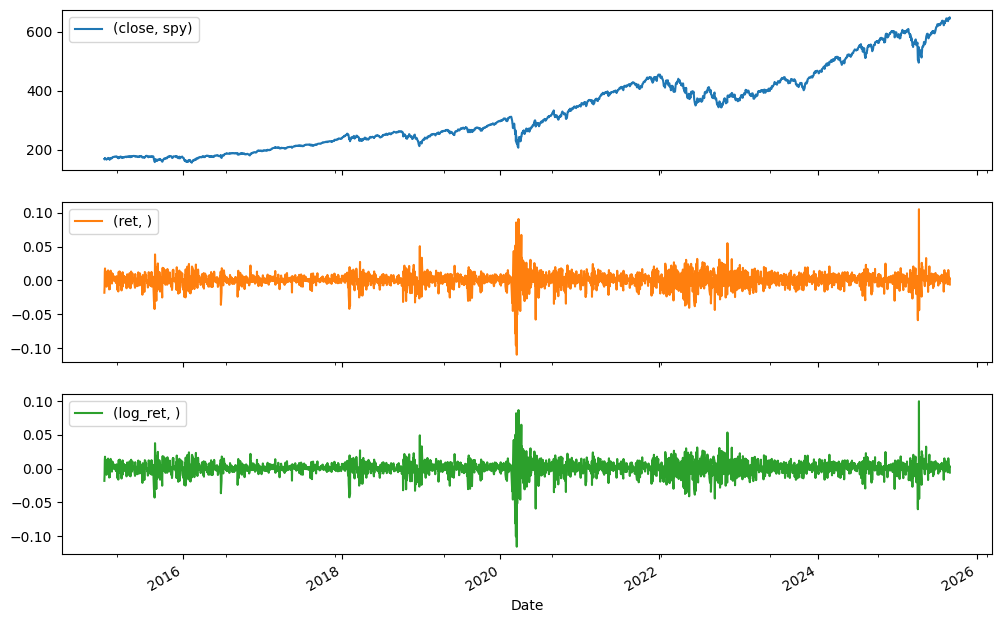

In [241]:
df.plot(y = ['close', 'ret', 'log_ret'], subplots = True, figsize = (12, 8))
plt.show()


In [242]:
## average daily returns

df['log_ret'].mean()
df['log_ret'].std()

## average annual returns

df['log_ret'].mean() * 252

print("percentages")

print("avg daily log return: ", df['log_ret'].mean() * 100)

print("std daily log return: ", df['log_ret'].std() * 100)

print("avg annual log return: ", df['log_ret'].mean() * 252 * 100)

print("std annual log return: ", df['log_ret'].std() * np.sqrt(252) * 100)

## cumulative log returns


percentages
avg daily log return:  0.049415966335869824
std daily log return:  1.1336687282962072
avg annual log return:  12.452823516639196
std annual log return:  17.996433145215704


In [243]:
df['cum_log_ret'] = df['log_ret'].cumsum()

## daily returns


<Axes: xlabel='Date'>

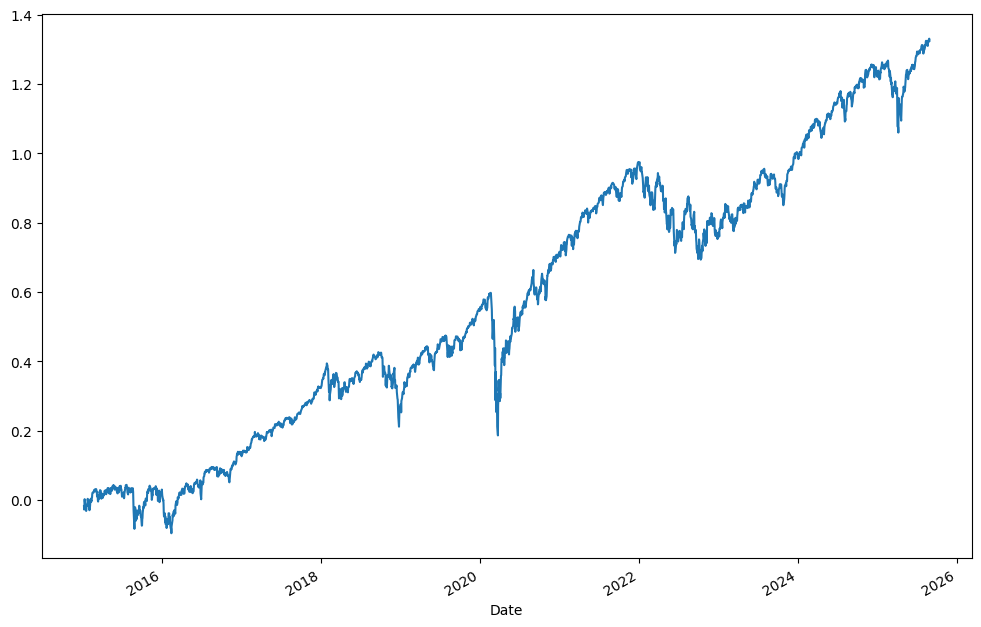

In [244]:
df['cum_log_ret'].plot(figsize = (12, 8))

In [245]:
df['cum_growth'] = np.exp(df['cum_log_ret'])

<Axes: xlabel='Date'>

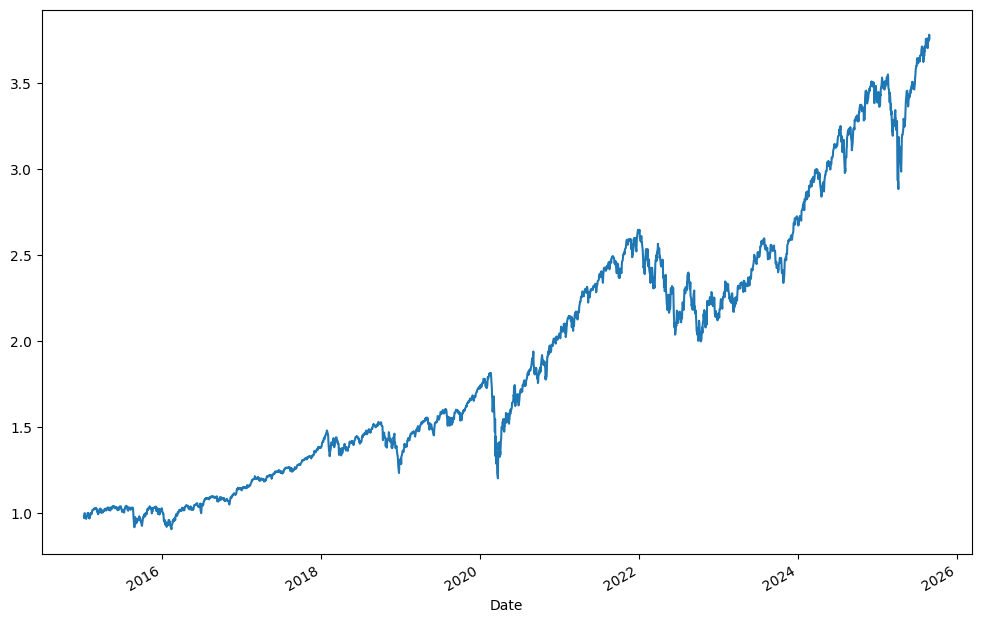

In [246]:
df['cum_growth'].plot(figsize = (12, 8))

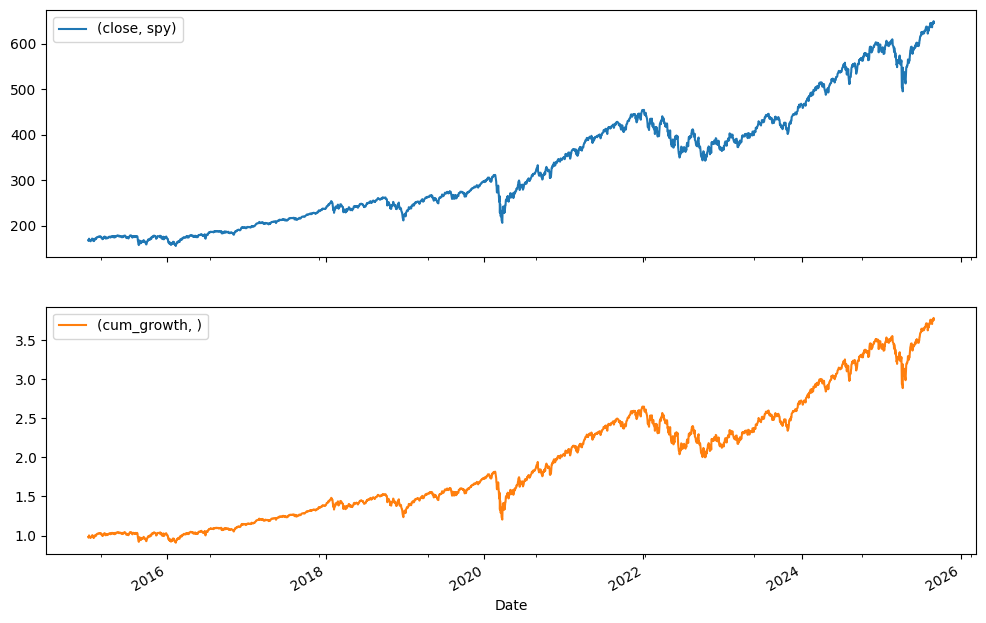

In [247]:
df[['close', 'cum_growth']].plot(subplots = True, figsize = (12, 8))
plt.show()

In [248]:
df['cum_growth_scaled'] = df['cum_growth'] * df['close'].iloc[0].to_numpy().item()

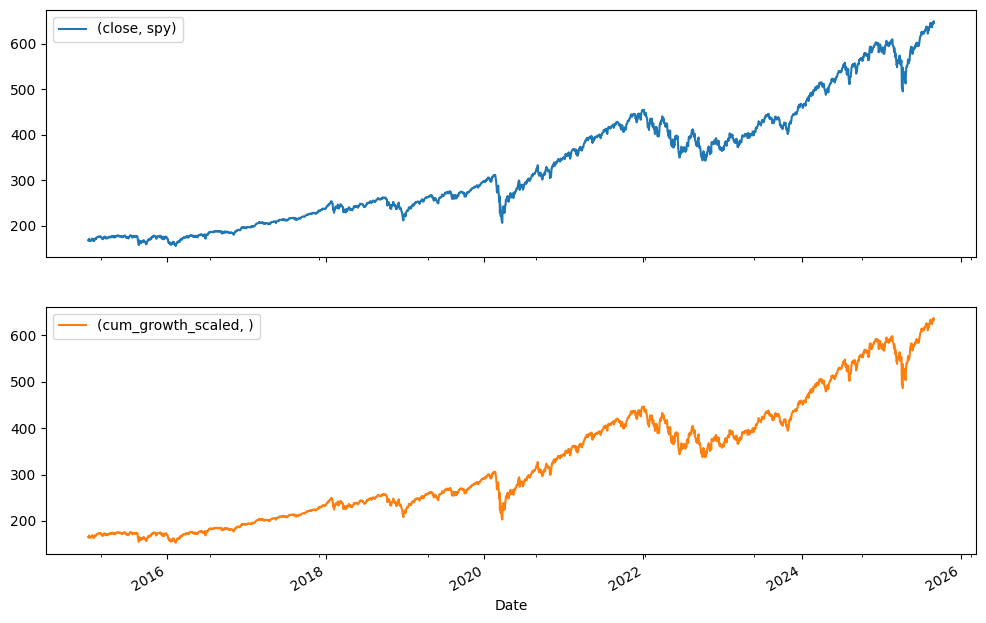

In [249]:
df[['close', 'cum_growth_scaled']].plot(subplots = True, figsize = (12, 8))
plt.show()

### Calculating Compounding Annual Growth Rate (CAGR)
#### Using returns

In [250]:
P_T = df['close'].iloc[-1]
P_not =  df['close'].iloc[0]
cagr_price = ( (P_T / df['close'].iloc[0]) ** (252/len(df['close'].to_numpy())) ) - 1
print("CAGR using prices: ", cagr_price.item())

CAGR using prices:  0.13455659108620432


### Calculating Compounding Annual Growth Rate (CAGR)
#### Using log returns

In [251]:
l_bar = df['log_ret'].mean()
cagr_log = np.exp(252 * l_bar) - 1
print("CAGR using log returns: ", cagr_log.item())

CAGR using log returns:  0.13261399955351094


### Arithmetic Annualized Returns

- simple average of periodic investment returns that does not account for compounding or volatility

In [252]:
arit_annualized_ret = 252 * df['ret'].mean()
print("Arithmetic Annualized Returns: ", arit_annualized_ret.item())

Arithmetic Annualized Returns:  0.14072225653770923


### Continuous Annualized Rate

- an interest or return rate that assumes compounding occurs an infinite number of times within a year, resulting in the maximum possible return for a given rate.

In [253]:
continuous_annual_rate = 252 * df['log_ret'].mean()
print("Continuous Annualized Rate: ", continuous_annual_rate.item())

Continuous Annualized Rate:  0.12452823516639196


### Volatility Drag

- Volatility drag, or "variance drain," is the phenomenon where an investment's compound growth rate is lower than its simple average return, leading to less wealth accumulation over time. This occurs because, mathematically, recovering from a percentage loss requires a greater percentage gain to break even. 

In [254]:
vol_drag_approx = 1/2 * 252 * df['ret'].var()
vol_drag = arit_annualized_ret - continuous_annual_rate
print('approximate volatility drag: ', vol_drag_approx.item(), '\nactual volatility drag: ', vol_drag.item())

approximate volatility drag:  0.016124045056753904 
actual volatility drag:  0.01619402137131727


### Approximation to the Continuous Annualized Rate

In [255]:
avg_log_approx = (df['ret'].mean() - 0.5 * df['ret'].var()) * 252
print("Approximation to the Continuous Annualized Rate: ", avg_log_approx.item())
print("difference between approximation and actual: ", (continuous_annual_rate - avg_log_approx).item())

Approximation to the Continuous Annualized Rate:  0.12459821148095533
difference between approximation and actual:  -6.997631456337472e-05


### Sharpe Ration

- return per unit of “typical wiggle”

In [256]:
r_safe = 0
T = len(df['close'].to_numpy())
avg_excess_ret = (df['ret'] - r_safe).mean()
print("average excess returns: ", avg_excess_ret)
wiggle = (df['ret'] - r_safe).std()
print("wiggle: ", wiggle)
sharpe = avg_excess_ret / wiggle
print("daily sharpe: ", sharpe)
annual_sharpe = (np.sqrt(252) * sharpe).item()
print("annual sharpe: ", annual_sharpe)

average excess returns:  0.0005584216529274176
wiggle:  0.011312321227826714
daily sharpe:  0.04936402014060377
annual sharpe:  0.7836295260385278


### Max Drawdown

- measures the largest peak-to-trough decline in the value of an investment over a specified period, expressed as a percentage. It indicates the maximum potential loss an investor could experience from a high point before reaching a new peak, helping to assess an investment's risk and downside volatility.

- A lower MDD signifies better capital preservation during periods of market decline.

In [257]:
# why does volatility assume return are "nice" (bell curves)

df['cum_max'] = df['cum_growth'].cummax()

drawdowns = (df['cum_growth'] - df['cum_max']) / df['cum_max']

max_drawdown = min(drawdowns)
date = list(drawdowns.to_numpy()).index(max_drawdown)


print("Max Drawdown of SPY: ", max_drawdown, "\nDate: ", df.iloc[date].name)

Max Drawdown of SPY:  -0.33717258779070414 
Date:  2020-03-23 00:00:00


In [258]:
import numpy as np
import pandas as pd

# ---------- Helpers ----------

def _to_series(x, name=None):
    s = pd.Series(x) if not isinstance(x, (pd.Series,)) else x.copy()
    if name and s.name is None: s.name = name
    return s.astype(float)


# ---------- CAGR ----------

def cagr_from_prices(prices, periods_per_year=252):
    """
    CAGR from a price or equity series (adjusted/total-return series recommended).
    """
    p = _to_series(prices, "price").dropna()
    if len(p) < 2:
        return np.nan
    years = (p.index[-1] - p.index[0]).days / 365.25 if hasattr(p.index, "freq") or isinstance(p.index, pd.DatetimeIndex) else (len(p) / periods_per_year)
    return (p.iloc[-1] / p.iloc[0])**(1/years) - 1

def cagr_from_log_returns(log_returns, periods_per_year=252):
    """
    CAGR from *log* returns (ℓ_t = ln(1+r_t)).
    Uses: CAGR = exp(periods_per_year * mean(log_ret)) - 1
    """
    l = _to_series(log_returns, "log_ret").dropna()
    if len(l) == 0:
        return np.nan
    return np.exp(periods_per_year * l.mean()) - 1

# ---------- Volatility (std) ----------

def annualized_vol(returns, periods_per_year=252, use_log=False):
    """
    Annualized volatility from simple returns r_t or log returns ℓ_t.
    """
    r = _to_series(returns, "ret").dropna()
    if len(r) == 0:
        return np.nan
    if use_log:
        # std of log returns
        return r.std(ddof=1) * np.sqrt(periods_per_year)
    else:
        # std of simple returns
        return r.std(ddof=1) * np.sqrt(periods_per_year)

# ---------- Sharpe ----------

def sharpe_ratio(returns, rf_annual=0.0, periods_per_year=252, use_log=False):
    """
    Sharpe ratio using *excess* returns over a (constant) annual risk-free rate.
    Inputs:
      - returns: simple r_t or log ℓ_t (set use_log accordingly)
      - rf_annual: annual risk-free rate as a decimal (e.g., 0.04 for 4%)
    Notes:
      - For log returns, we approximate excess by subtracting rf/period from ℓ_t.
      - With daily data, difference vs. precise compounding is negligible.
    """
    r = _to_series(returns, "ret").dropna()
    if len(r) == 0:
        return np.nan
    rf_per = rf_annual / periods_per_year
    if use_log:
        ex = r - rf_per
        daily_sharpe = ex.mean() / ex.std(ddof=1)
    else:
        ex = r - rf_per
        daily_sharpe = ex.mean() / ex.std(ddof=1)
    return daily_sharpe * np.sqrt(periods_per_year)

# ----------------- Sortino -------------------

def sortino_ratio(returns, target_annual=0.0, periods_per_year=252):
    """
    Sortino focuses on downside risk only.
    Steps:
      1) Convert annual target to per-period target.
      2) Excess = r_t - target_per.
      3) Downside deviations = min(0, excess).
      4) Downside deviation (σ↓) = sqrt(mean( downside^2 )).
      5) Sortino_per_period = mean(excess) / σ↓.
      6) Annualize by sqrt(periods_per_year), same as Sharpe under i.i.d. assumption.
    Notes:
      - If there are no downside observations, returns np.inf (all upside).
      - Pass simple returns (not logs) for interpretability.
    """
    r = _to_series(returns, "ret").dropna()
    if len(r) == 0:
        return np.nan
    target_per = target_annual / periods_per_year
    ex = r - target_per
    downside = np.minimum(0.0, ex)
    # downside deviation (population version)
    denom = np.sqrt(np.mean(downside**2))
    if denom == 0:
        return np.inf
    per_period = ex.mean() / denom
    return per_period * np.sqrt(periods_per_year)

# ---------- Max Drawdown ----------

def max_drawdown_from_equity(equity):
    """
    Max drawdown from an equity curve (starts anywhere, not necessarily 1.0).
    Returns: (mdd, peak_date, trough_date, recovery_date)
      - mdd is negative (e.g., -0.337 = -33.7%)
      - peak_date: date of the high before the worst drop
      - trough_date: date of the lowest point in that drop
      - recovery_date: first date equity recovers that peak (or None if never)
    """
    eq = _to_series(equity, "equity").dropna()
    if len(eq) == 0:
        return np.nan, None, None, None

    running_max = eq.cummax()
    drawdown = (eq - running_max) / running_max

    trough_idx = drawdown.idxmin()
    mdd = drawdown.loc[trough_idx]

    # peak is the last time we hit the running max before the trough
    peak_mask = eq.loc[:trough_idx] == running_max.loc[:trough_idx]
    peak_idx = peak_mask[peak_mask].index[-1]

    # recovery: first time after trough that equity >= previous peak
    recov = eq.loc[trough_idx:]
    try:
        recovery_idx = recov[recov >= running_max.loc[peak_idx]].index[0]
    except IndexError:
        recovery_idx = None

    return float(mdd), peak_idx, trough_idx, recovery_idx

def max_drawdown_from_returns(returns, start_equity=1.0):
    """
    Convenience: build an equity curve from returns, then call MDD.
    Uses simple returns: equity_t = equity_{t-1} * (1 + r_t).
    """
    r = _to_series(returns, "ret").dropna()
    if len(r) == 0:
        return np.nan, None, None, None
    equity = (1 + r).cumprod() * float(start_equity)
    return max_drawdown_from_equity(equity)

def calmar_ratio(equity, periods_per_year=252):
    cagr = cagr_from_prices(equity, periods_per_year)
    mdd, _, _, _ = max_drawdown_from_equity(equity)
    if pd.isna(cagr) or pd.isna(mdd) or mdd == 0:
        return np.nan
    return cagr / abs(mdd)

def max_drawdown_from_equity(equity):
    """
    Returns (mdd, peak_date, trough_date, recovery_date).
    mdd is negative (e.g., -0.34).
    """
    eq = _to_series(equity, "equity").dropna()
    if len(eq) == 0:
        return np.nan, None, None, None
    runmax = eq.cummax()
    dd = (eq - runmax) / runmax
    trough = dd.idxmin()
    mdd = float(dd.loc[trough])
    peak = (eq.loc[:trough] == runmax.loc[:trough])
    peak = peak[peak].index[-1]
    rec = eq.loc[trough:]
    try:
        recovery = rec[rec >= runmax.loc[peak]].index[0]
    except IndexError:
        recovery = None
    return mdd, peak, trough, recovery

def equity_from_returns(returns, start_equity=1.0):
    r = _to_series(returns, "ret").dropna()
    if len(r) == 0:
        return pd.Series([], dtype=float)
    return (1 + r).cumprod() * float(start_equity)

In [259]:
def equity_from_returns(returns, start_equity=1.0):
    r = _to_series(returns, "ret").dropna()
    if len(r) == 0:
        return pd.Series([], dtype=float)
    return (1 + r).cumprod() * float(start_equity)

def report_card(name, equity=None, prices=None, log_returns=None,
                simple_returns=None, rf_annual=0.0, periods_per_year=252):
    """
    Report CAGR, Vol, Sharpe, Sortino, Calmar, and MDD.
    Must have equity or prices to calculate CAGR consistently.
    """
    # Equity priority
    if equity is None and prices is not None:
        equity = prices

    if equity is not None:
        cagr = cagr_from_prices(equity, periods_per_year)
        mdd, peak, trough, rec = max_drawdown_from_equity(equity)
    elif log_returns is not None:
        cagr = cagr_from_log_returns(log_returns, periods_per_year)
        eq = equity_from_returns(np.expm1(log_returns))
        mdd, peak, trough, rec = max_drawdown_from_equity(eq)
    else:
        raise ValueError("Need equity, prices, or returns")

    # returns for risk measures
    if simple_returns is None and log_returns is not None:
        sr = np.expm1(log_returns)
    elif simple_returns is not None:
        sr = simple_returns
    else:
        sr = equity.pct_change().dropna()

    vol = annualized_vol(sr, periods_per_year)
    sharpe = sharpe_ratio(sr, rf_annual=rf_annual, periods_per_year=periods_per_year)
    sortino = sortino_ratio(sr, target_annual=0.0, periods_per_year=periods_per_year)
    calmar = cagr / abs(mdd) if mdd != 0 else np.nan

    def pct(x): return "nan" if pd.isna(x) else f"{100*x:6.2f}%"
    print(f"=== {name} ===")
    print(f"CAGR:   {pct(cagr)}")
    print(f"Vol:    {pct(vol)}")
    print(f"Sharpe: {sharpe:6.3f}" if pd.notna(sharpe) else "Sharpe: nan")
    print(f"Sortino:{sortino:6.3f}" if pd.notna(sortino) and not np.isinf(sortino) else f"Sortino: {sortino}")
    print(f"Calmar: {calmar:6.3f}" if pd.notna(calmar) else "Calmar: nan")
    print(f"MDD:    {pct(mdd)}  (peak: {peak}, trough: {trough}, recovery: {rec})")


Volatility → if you can handle the daily swings.

Drawdown → if you can survive the worst storm without quitting.

### Moving Averages

In [260]:
copy_df = df.copy()

In [261]:

copy_df['sma'] = df['close'].rolling(window=20).mean()
copy_df['lma'] = df['close'].rolling(window=100).mean()


In [262]:
copy_df

Price,close,high,low,open,volume,ret,log_ret,cum_log_ret,cum_growth,cum_growth_scaled,cum_max,sma,lma
Ticker,spy,spy,spy,spy,spy,,,,,,,,
Date,,,,,,,,,,,,,
2015-01-05,168.469574,170.682757,168.160567,170.515727,169632600,-0.018060,-0.018225,-0.018225,0.981940,165.427066,0.981940,NaN,NaN
2015-01-06,166.882751,169.304726,166.080987,168.778568,209151400,-0.009419,-0.009464,-0.027688,0.972691,163.868901,0.981940,NaN,NaN
2015-01-07,168.962280,169.304701,167.768000,168.218984,125346700,0.012461,0.012384,-0.015304,0.984812,165.910874,0.984812,NaN,NaN
2015-01-08,171.960571,172.177722,170.365415,170.382109,147217800,0.017745,0.017590,0.002285,1.002288,168.855017,1.002288,NaN,NaN
2015-01-09,170.582520,172.394827,169.964493,172.378120,158567300,-0.008014,-0.008046,-0.005761,0.994256,167.501853,1.002288,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-25,642.469971,645.289978,642.349976,644.039978,51274300,-0.004401,-0.004411,1.320340,3.744695,630.867165,3.761248,637.065497,594.366234
2025-08-26,645.159973,645.510010,641.570007,642.200012,51581600,0.004187,0.004178,1.324518,3.760374,633.508586,3.761248,637.560495,595.189272


In [263]:
copy_df['strat_pos'] = (copy_df['sma'] > copy_df['lma']).astype(int)
copy_df['strat_pos'] = copy_df['strat_pos'].shift(1)
copy_df['strat_ret'] = copy_df['ret'] * copy_df['strat_pos']

In [264]:
copy_df['strat_log_ret'] = np.log1p(copy_df['strat_ret'])

In [265]:
CAGR_strat = np.exp(252* copy_df['strat_log_ret'].mean()) - 1
print("CAGR of MA: ", CAGR_strat)
daily_sharpe_strat = copy_df['strat_log_ret'].mean() / copy_df['strat_log_ret'].std()
annual_sharpe_strat = (np.sqrt(252) * daily_sharpe_strat).item()
print("Wiggle of MA: ", copy_df['strat_log_ret'].std())
print("Daily Sharpe of MA: ", daily_sharpe_strat, "\nAnnual Sharpe of MA: ", annual_sharpe_strat)
copy_df['strat_cum_log_ret'] = copy_df['strat_log_ret'].cumsum()
copy_df['strat_cum_growth'] = np.exp(copy_df['strat_cum_log_ret'])
copy_df['strat_cum_max'] = copy_df['strat_cum_growth'].cummax()

drawdowns = (copy_df['strat_cum_growth'] - copy_df['strat_cum_max']) / copy_df['strat_cum_max']
drawdowns = drawdowns.dropna()
max_drawdown = min(drawdowns)
date = list(drawdowns.to_numpy()).index(max_drawdown)


print("Max Drawdown of MA Start: ", max_drawdown, "\nDate of MDD: ", copy_df.iloc[date].name)


CAGR of MA:  0.07575945651998794
Wiggle of MA:  0.007740380559776716
Daily Sharpe of MA:  0.03743862686291361 
Annual Sharpe of MA:  0.5943197766420701


Max Drawdown of MA Start:  -0.21915319526185936 
Date of MDD:  2020-06-10 00:00:00


In [266]:
money = 100000
shares = 0
fee = 0.001
portfolio_values = []
for i in range(0, T):
    
    price = copy_df['close'].iloc[i]
    signal = copy_df['strat_pos'].iloc[i]

    if signal == 1 and shares == 0:
        shares = int((money // (price * (1 + fee))).iloc[0])
        cost = shares * price * (1 + fee)
        money -= cost

    elif signal == 0 and shares > 0:
        proceeds = shares * price * (1 + fee)
        money += proceeds
        shares = 0
    
    portfolio_values.append(money + shares * price)

copy_df['portfolio'] = portfolio_values
portfolio_values[-1].item()

167255.79039413453

In [267]:
copy_df['portfolio']

Date
2015-01-05    Ticker
spy    100000.0
Name: 2015-01-05 00:00:...
2015-01-06    Ticker
spy    100000.0
Name: 2015-01-06 00:00:...
2015-01-07    Ticker
spy    100000.0
Name: 2015-01-07 00:00:...
2015-01-08    Ticker
spy    100000.0
Name: 2015-01-08 00:00:...
2015-01-09    Ticker
spy    100000.0
Name: 2015-01-09 00:00:...
                                    ...                        
2025-08-25           Ticker
spy    166587.565968
dtype: float64
2025-08-26             Ticker
spy    167284.2766
dtype: float64
2025-08-27            Ticker
spy    167665.01482
dtype: float64
2025-08-28           Ticker
spy    168258.119129
dtype: float64
2025-08-29           Ticker
spy    167255.790394
dtype: float64
Name: portfolio, Length: 2680, dtype: object

In [268]:
warnings.filterwarnings('ignore')

cagr_spy = cagr_from_prices(copy_df['close'].squeeze())
vol_spy  = annualized_vol(copy_df['log_ret'], use_log=True)
sharpe_spy = sharpe_ratio(copy_df['log_ret'], rf_annual=0.0, use_log=True)
mdd_spy, peak_spy, trough_spy, rec_spy = max_drawdown_from_equity(copy_df['close'].squeeze())
sortino_spy = sortino_ratio(copy_df['log_ret'])

print("SPY   \nCAGR:", cagr_spy * 100, "\nSharpe:", sharpe_spy , "\nSortino:", sortino_spy, "\nMDD:", mdd_spy * 100, "@", trough_spy)

print()
# --- Strategy (from log returns & equity) ---
cagr_strat = cagr_from_log_returns(copy_df['strat_log_ret'])
vol_strat  = annualized_vol(copy_df['strat_log_ret'], use_log=True)
sharpe_strat = sharpe_ratio(copy_df['strat_log_ret'], rf_annual=0.0, use_log=True)
mdd_strat, peak_s, trough_s, rec_s = max_drawdown_from_equity(copy_df['portfolio'])
sortino_ma = sortino_ratio(copy_df['strat_log_ret'])

print("MA    \nCAGR:", cagr_strat * 100, "\nSharpe:", sharpe_strat, "\nSortino:",sortino_ma, "\nMDD:", mdd_strat * 100, "@", trough_s)

SPY   
CAGR: 13.438736496878278 
Sharpe: 0.6919606466545701 
Sortino: 0.9576518685182352 
MDD: -33.7172587790704 @ 2020-03-23 00:00:00

MA    
CAGR: 7.575945651998794 
Sharpe: 0.5943197766420701 
Sortino: 0.7918810210630579 
MDD: -29.16147393146538 @ 2020-06-11 00:00:00


In [269]:
warnings.filterwarnings('ignore')

report_card(
    "SPY (buy & hold)",
    prices=copy_df['close'].squeeze(),                    # adjusted prices recommended
    log_returns=copy_df['log_ret'].squeeze(),             # you already computed this
    simple_returns=copy_df['ret'].squeeze(),              # if you have it; else omit
    rf_annual=0.0
)

print() 

report_card(
    "MA 20/100 (realistic)",
    equity=copy_df['portfolio'].squeeze(),                # equity curve from your loop
    simple_returns=copy_df['portfolio'].pct_change(),  # optional; report_card can derive
    rf_annual=0.0
)


=== SPY (buy & hold) ===
CAGR:    13.44%
Vol:     17.96%
Sharpe:  0.784
Sortino: 1.103
Calmar:  0.399
MDD:    -33.72%  (peak: 2020-02-19 00:00:00, trough: 2020-03-23 00:00:00, recovery: 2020-08-10 00:00:00)

=== MA 20/100 (realistic) ===
CAGR:     4.95%
Vol:     12.62%
Sharpe:  0.447
Sortino: 0.584
Calmar:  0.170
MDD:    -29.16%  (peak: 2020-02-19 00:00:00, trough: 2020-06-11 00:00:00, recovery: 2021-04-29 00:00:00)


### Price vs. 200-day SMA

In [270]:
df = copy_df.copy()

In [271]:
print(type(df['close']))
print(df['close'].shape)


<class 'pandas.core.frame.DataFrame'>
(2680, 1)


In [272]:
df['sma200'] = df['close'].rolling(200).mean()
df['sma200_pos'] = (df['close'].squeeze() > df['sma200']).astype(int).shift(1)


In [273]:
df['sma200_log_ret'] = df['sma200_pos'] * df['log_ret']

# Frictionless Equity
df['sma200_cum_growth'] = np.exp(df['sma200_log_ret'].cumsum())

In [274]:
cagr_var = cagr_from_log_returns(df['sma200_log_ret'])
sharpe_var = sharpe_ratio(df['sma200_log_ret'])
sortino_var = sortino_ratio(df['sma200_log_ret'])
mdd_var, peak_v, trough_v, rec_v = max_drawdown_from_equity(df['sma200_cum_growth'])
calmar_var = cagr_var / abs(mdd_var)
volatility = df['sma200_log_ret'].std()

print("CAGR:", cagr_var * 100, "%")
print("Volatility:", (252**(1/2)) * volatility * 100, "%")
print("Sharpe:", sharpe_var)
print("Sortino:", sortino_var)
print("Calmar:", calmar_var)
print("MDD:", mdd_var * 100,"%", "@", trough_v)


CAGR: 9.851097453429492 %
Volatility: 11.441688298820612 %
Sharpe: 0.821169051380635
Sortino: 1.1079699578831488
Calmar: 0.49735897335817136
MDD: -19.806815562037237 % @ 2023-03-17 00:00:00


In [275]:
money = 100000
shares = 0
fee = 0.001
portfolio_values = []
for i in range(0, T):
    
    price = df['close'].iloc[i]
    signal = df['sma200_pos'].iloc[i]

    if signal == 1 and shares == 0:
        shares = int((money // (price * (1 + fee))).iloc[0])
        cost = shares * price * (1 + fee)
        money -= cost

    elif signal == 0 and shares > 0:
        proceeds = shares * price * (1 + fee)
        money += proceeds
        shares = 0
    
    portfolio_values.append(money + shares * price)

df['sma200_portfolio'] = portfolio_values

In [276]:
report_card(
    "SMA200 vs. Price",
    equity = df['sma200_portfolio'].squeeze()
)

=== SMA200 vs. Price ===
CAGR:     8.80%
Vol:     11.43%
Sharpe:  0.796
Sortino: 1.086
Calmar:  0.375
MDD:    -23.43%  (peak: 2022-01-03 00:00:00, trough: 2023-03-15 00:00:00, recovery: 2024-03-19 00:00:00)


In [277]:
df['buyhold_equity'] = df['close'].squeeze() / df['close'].squeeze().iloc[0]
# extract the scalar from each nested Series
df['sma200_portfolio_num'] = df['sma200_portfolio'].apply(lambda s: float(s.squeeze()))
df['sma200_realistic'] = df['sma200_portfolio_num'] / df['sma200_portfolio_num'].iloc[0]


In [278]:
print(df[['portfolio', 'sma200_realistic']].head(10))
print(df[['portfolio', 'sma200_realistic']].tail(10))


Price                                               portfolio sma200_realistic
Ticker                                                                        
Date                                                                          
2015-01-05  Ticker
spy    100000.0
Name: 2015-01-05 00:00:...              1.0
2015-01-06  Ticker
spy    100000.0
Name: 2015-01-06 00:00:...              1.0
2015-01-07  Ticker
spy    100000.0
Name: 2015-01-07 00:00:...              1.0
2015-01-08  Ticker
spy    100000.0
Name: 2015-01-08 00:00:...              1.0
2015-01-09  Ticker
spy    100000.0
Name: 2015-01-09 00:00:...              1.0
2015-01-12  Ticker
spy    100000.0
Name: 2015-01-12 00:00:...              1.0
2015-01-13  Ticker
spy    100000.0
Name: 2015-01-13 00:00:...              1.0
2015-01-14  Ticker
spy    100000.0
Name: 2015-01-14 00:00:...              1.0
2015-01-15  Ticker
spy    100000.0
Name: 2015-01-15 00:00:...              1.0
2015-01-16  Ticker
spy    100000.0
Name: 2015-01-16 

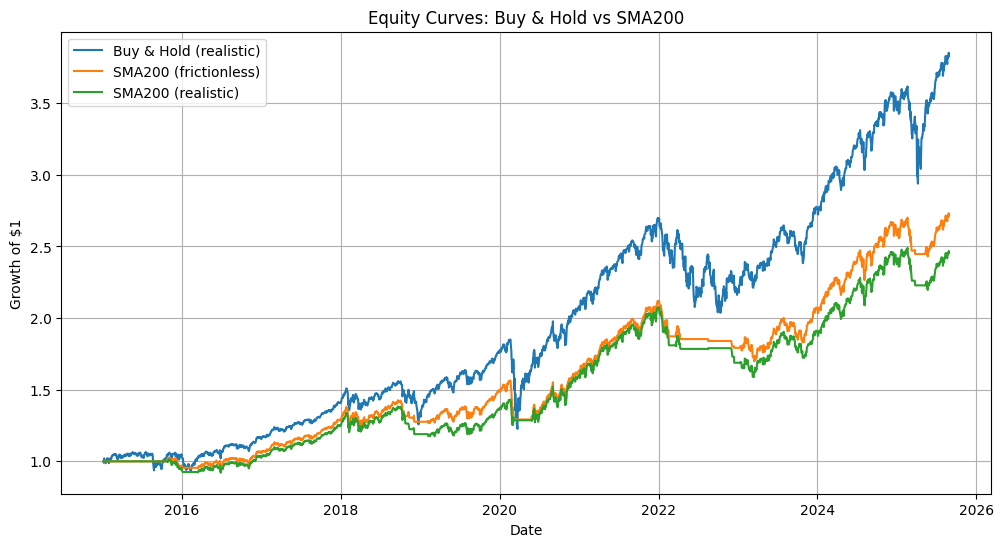

In [279]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['buyhold_equity'], label='Buy & Hold (realistic)')
plt.plot(df.index, df['sma200_cum_growth'], label='SMA200 (frictionless)')
plt.plot(df.index, df['sma200_realistic'], label='SMA200 (realistic)')

plt.title("Equity Curves: Buy & Hold vs SMA200")
plt.ylabel("Growth of $1")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()


### Position Sizing

Lesson 2.1 — Position Sizing: Metrics
               Full (w=1)  Half (w=0.5)  Vol-Target (15%)
Ann. Return        0.1407        0.0704            0.1637
Ann. Vol           0.1795        0.0898            0.1532
Sharpe (rf=0)      0.7838        0.7838            1.0681
Max Drawdown       0.1761        0.1207            0.1473


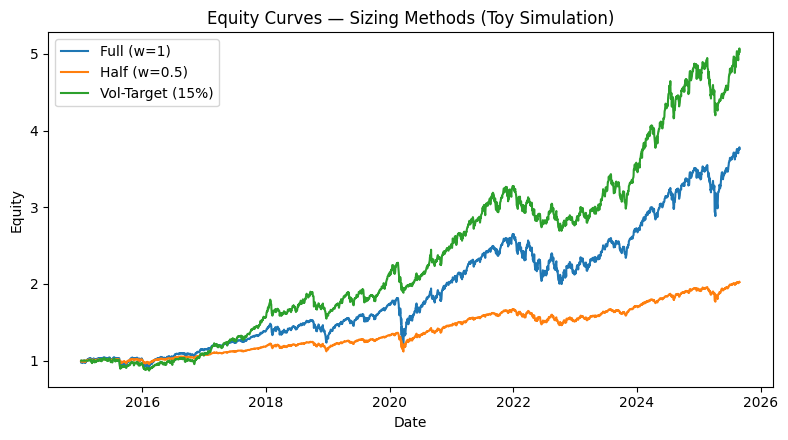

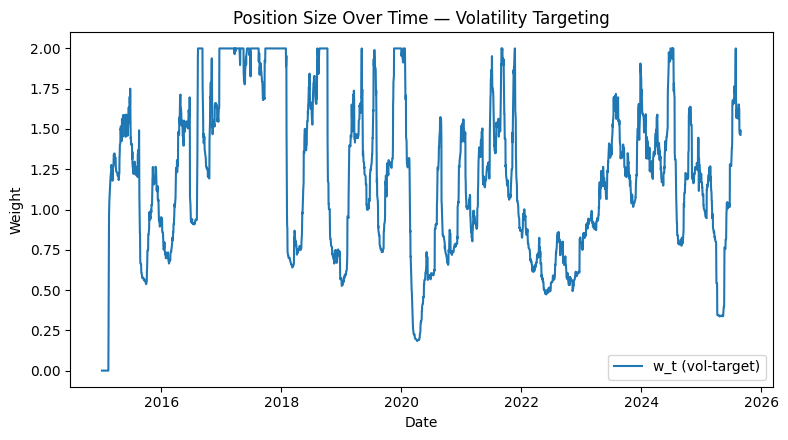

In [281]:
# Lesson 2.1 — Position Sizing: toy simulation to illustrate effects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt



# Always-in signal here just for sizing illustration
df["s"] = 1.0

# Strategy 1: Full (w=1)
df["w_full"] = 1.0
df["p_full"] = df["w_full"] * df["s"] * df["ret"]

# Strategy 2: Half (w=0.5)
df["w_half"] = 0.5
df["p_half"] = df["w_half"] * df["s"] * df["ret"]

# Strategy 3: Vol-targeted
# Estimate rolling daily vol with a 30-day window, annualize
roll = 30
df["sigma_daily_hat"] = df["ret"].rolling(roll).std(ddof=0)
df["sigma_annual_hat"] = df["sigma_daily_hat"] * sqrt(252.0)

sigma_target = 0.15  # 15% annual target
w_max = 2.0
eps = 1e-8

df["w_vt_raw"] = sigma_target / (df["sigma_annual_hat"] + eps)
df["w_vt"] = df["w_vt_raw"].clip(lower=0.0, upper=w_max).fillna(0.0)
df["p_vt"] = df["w_vt"] * df["s"] * df["ret"]

# Equity curves
for col in ["p_full", "p_half", "p_vt"]:
    df[f"eq_{col}"] = (1 + df[col]).cumprod()

# Metrics helper
def metrics(p):
    ann_ret = p.mean() * 252.0
    ann_vol = p.std(ddof=0) * sqrt(252.0)
    sharpe = ann_ret / ann_vol if ann_vol > 0 else np.nan
    mdd = (df[f"eq_{p.name}"].cummax() - df[f"eq_{p.name}"]).max() / df[f"eq_{p.name}"].cummax().max()
    return pd.Series({"Ann. Return": ann_ret, "Ann. Vol": ann_vol, "Sharpe (rf=0)": sharpe, "Max Drawdown": mdd})

m_full = metrics(df["p_full"].rename("p_full"))
m_half = metrics(df["p_half"].rename("p_half"))
m_vt = metrics(df["p_vt"].rename("p_vt"))

metrics_df = pd.concat([m_full, m_half, m_vt], axis=1)
metrics_df.columns = ["Full (w=1)", "Half (w=0.5)", "Vol-Target (15%)"]

# Display metrics and one chart
print("Lesson 2.1 — Position Sizing: Metrics")
print(metrics_df.round(4))

plt.figure(figsize=(8,4.5))
plt.plot(df.index, df["eq_p_full"], label="Full (w=1)")
plt.plot(df.index, df["eq_p_half"], label="Half (w=0.5)")
plt.plot(df.index, df["eq_p_vt"], label="Vol-Target (15%)")
plt.title("Equity Curves — Sizing Methods (Toy Simulation)")
plt.xlabel("Date")
plt.ylabel("Equity")
plt.legend()
plt.tight_layout()
plt.show()

# Also visualize time-varying weights for vol-targeting
plt.figure(figsize=(8,4.5))
plt.plot(df.index, df["w_vt"], label="w_t (vol-target)")
plt.title("Position Size Over Time — Volatility Targeting")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.legend()
plt.tight_layout()
plt.show()
